In [5]:
import pandas as pd

In [6]:
# Load the dataset
file_path = 'Pathogen detection Salmonella enterica.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
df.head()

,#Organism group,Strain,Isolate identifiers,Serovar,Isolate,Create date,Location,Isolation source,Isolation type,SNP cluster,Min-same,Min-diff,BioSample,Assembly,AMR genotypes,Computed types
0,Salmonella enterica,SQ0227,"""93-6175B"",""SQ0227"",""SRS426868""",enteritidis,PDT000000002.3,2014-01-04T17:03:07Z,USA: Western Region,Ocean,environmental/other,PDS000032687.2,0.0,NaN,SAMN02147118,NaN,"ant(2'')-Ia=COMPLETE,aph(3')-Ia=COMPLETE,blaTE...","antigen_formula=9:g,m:-,serotype=Enteritidis"
1,Salmonella enterica,SQ0228,"""93-2836A"",""SQ0228"",""SRS426867""",enteritidis,PDT000000003.3,2014-01-04T17:03:07Z,USA: Western Region,Ocean,environmental/other,PDS000032687.2,0.0,NaN,SAMN02147119,NaN,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=9:g,m:-,serotype=Enteritidis"
2,Salmonella enterica,SQ0229,"""93-7741"",""SQ0229"",""SRS426869""",enteritidis,PDT000000004.3,2014-01-04T17:03:07Z,USA: Western Region,Ocean,environmental/other,PDS000065776.23,0.0,25.0,SAMN02147120,NaN,"mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=9:g,m:-,serotype=Enteritidis"
3,Salmonella enterica,Gen_001782,"""Gen_001782"",""SRS426891""",Heidelberg,PDT000000005.4,2014-01-04T17:03:07Z,USA,food,environmental/other,PDS000150683.10,2.0,2.0,SAMN02147121,GCA_010121905.1,"fosA7=COMPLETE,mdsA=COMPLETE,mdsB=COMPLETE","antigen_formula=4:r:1,2,serotype=Heidelberg"
4,Salmonella enterica,Gen_001783,"""Gen_001783"",""SRS426892""",Heidelberg,PDT000000006.4,2014-01-04T17:03:07Z,USA,food,environmental/other,PDS000150683.10,2.0,17.0,SAMN02147122,GCA_010121865.1,"blaCMY-2=COMPLETE,fosA7=COMPLETE,mdsA=COMPLETE...","antigen_formula=4:r:1,2,serotype=Heidelberg"


In [7]:
df.shape

(558819, 16)

In [8]:
# View basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558819 entries, 0 to 558818
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   #Organism group      558819 non-null  object 
 1   Strain               521387 non-null  object 
 2   Isolate identifiers  558784 non-null  object 
 3   Serovar              271461 non-null  object 
 4   Isolate              558819 non-null  object 
 5   Create date          558819 non-null  object 
 6   Location             493788 non-null  object 
 7   Isolation source     266854 non-null  object 
 8   Isolation type       519107 non-null  object 
 9   SNP cluster          503772 non-null  object 
 10  Min-same             465867 non-null  float64
 11  Min-diff             373323 non-null  float64
 12  BioSample            558813 non-null  object 
 13  Assembly             468778 non-null  object 
 14  AMR genotypes        543238 non-null  object 
 15  Computed types   

In [9]:
# Dropping columns with excessive missing values ('Serovar' and 'Isolation source')
df_cleaned = df.drop(columns=['Serovar', 'Isolation source'])

In [10]:
# Dropping rows with missing values in critical columns
df_cleaned = df_cleaned.dropna(subset=['Strain', 'Location', 'Isolation type', 'SNP cluster'])

In [11]:
# Forward fill missing values in numerical columns
df_cleaned[['Min-same', 'Min-diff']] = df_cleaned[['Min-same', 'Min-diff']].fillna(method='ffill')

In [12]:
# Convert 'Create date' to datetime format
df_cleaned['Create date'] = pd.to_datetime(df_cleaned['Create date'])

In [13]:
# Remove duplicate rows based on the 'Isolate' column
df_cleaned = df_cleaned.drop_duplicates(subset=['Isolate'])

In [14]:
# Save the cleaned dataset to a new CSV file
cleaned_file_path = 'Cleaned_Pathogen_detection_Salmonella_enterica.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)

# Output a confirmation message
print(f"Cleaned dataset saved as {cleaned_file_path}")

Cleaned dataset saved as Cleaned_Pathogen_detection_Salmonella_enterica.csv


In [15]:
# Display basic information of the cleaned dataset
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419108 entries, 0 to 558818
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   #Organism group      419108 non-null  object             
 1   Strain               419108 non-null  object             
 2   Isolate identifiers  419081 non-null  object             
 3   Isolate              419108 non-null  object             
 4   Create date          419108 non-null  datetime64[ns, UTC]
 5   Location             419108 non-null  object             
 6   Isolation type       419108 non-null  object             
 7   SNP cluster          419108 non-null  object             
 8   Min-same             419108 non-null  float64            
 9   Min-diff             419106 non-null  float64            
 10  BioSample            419108 non-null  object             
 11  Assembly             370593 non-null  object             
 12  AMR gen

In [16]:
df_cleaned['Min-diff'].fillna(df_cleaned['Min-diff'].median(), inplace=True)


In [17]:
df_cleaned['Create_Year'] = df_cleaned['Create date'].dt.year
df_cleaned['Create_Month'] = df_cleaned['Create date'].dt.month
df_cleaned['Create_Weekday'] = df_cleaned['Create date'].dt.weekday


In [18]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['#Organism group', 'Strain', 'Isolate identifiers', 'Isolate', 'Location', 
            'Isolation type', 'SNP cluster', 'BioSample', 'Assembly', 'AMR genotypes', 
            'Computed types']

le = LabelEncoder()
for col in cat_cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))


In [19]:
df_cleaned['Assembly_missing'] = df_cleaned['Assembly'].isnull().astype(int)


In [20]:
df_cleaned['SNP_ratio'] = df_cleaned['Min-same'] / (df_cleaned['Min-diff'] + 1e-6)


In [21]:
features = [
    'Create_Year', 'Create_Month', 'Create_Weekday', 'Min-same', 'Min-diff', 
    'SNP_ratio', 'Assembly_missing'
] + cat_cols


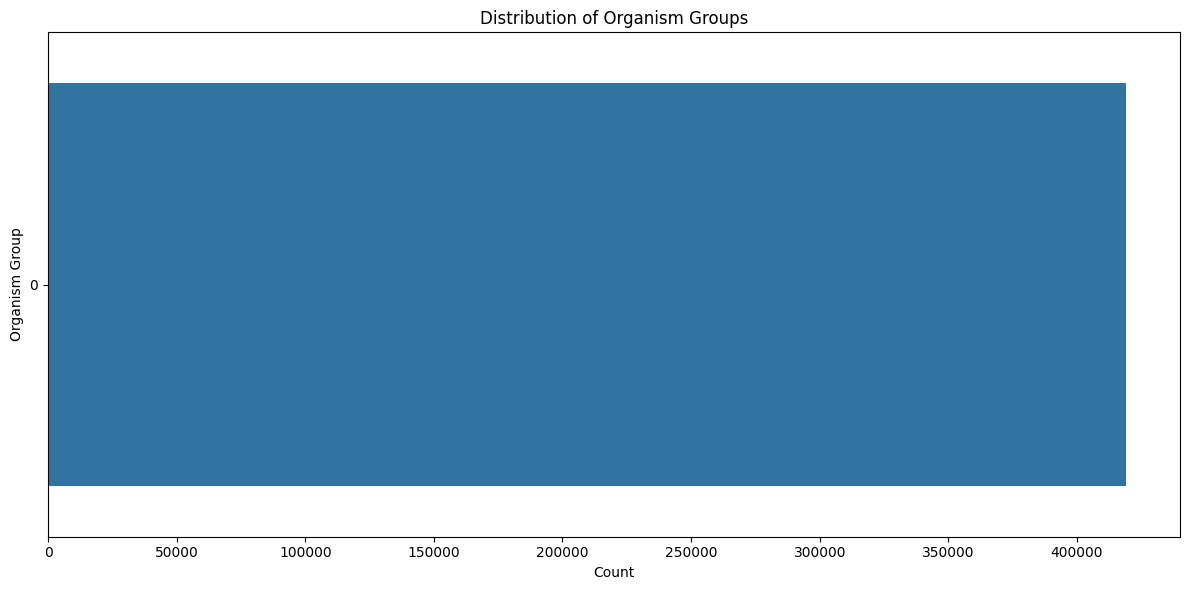

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.countplot(y='#Organism group', data=df_cleaned, order=df_cleaned['#Organism group'].value_counts().index)
plt.title('Distribution of Organism Groups')
plt.xlabel('Count')
plt.ylabel('Organism Group')
plt.tight_layout()
plt.show()


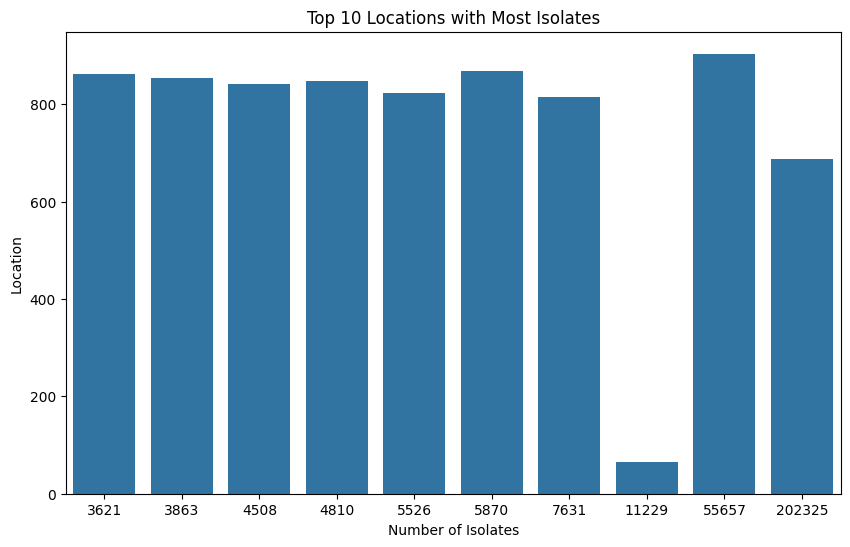

In [23]:
top_locations = df_cleaned['Location'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 10 Locations with Most Isolates')
plt.xlabel('Number of Isolates')
plt.ylabel('Location')
plt.show()


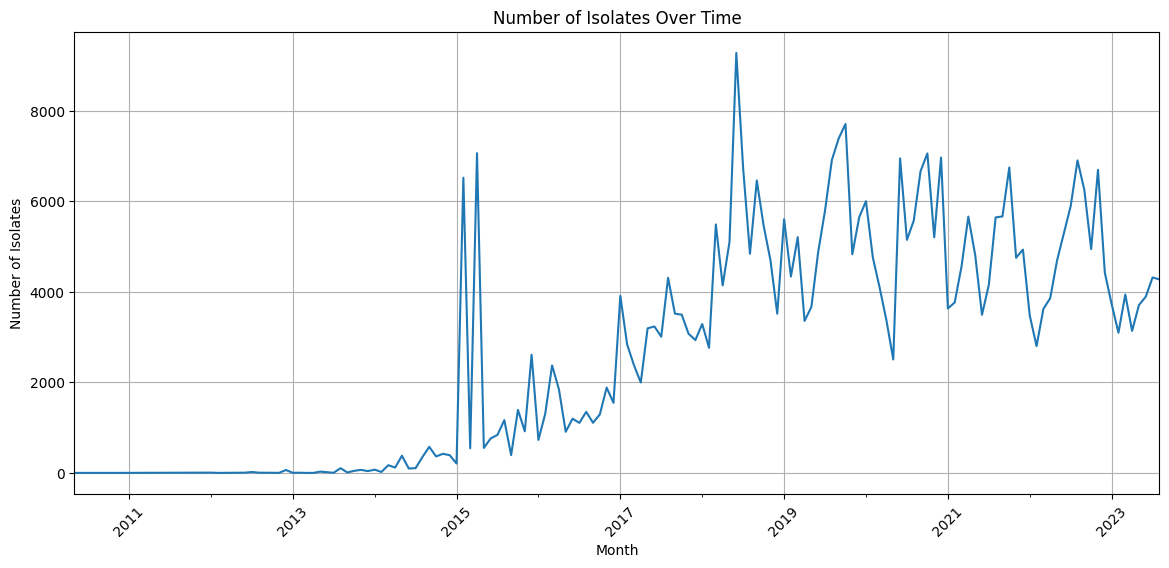

In [24]:
df_cleaned['Create_Month'] = df_cleaned['Create date'].dt.to_period('M')
monthly_counts = df_cleaned['Create_Month'].value_counts().sort_index()

plt.figure(figsize=(14,6))
monthly_counts.plot()
plt.title('Number of Isolates Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Isolates')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


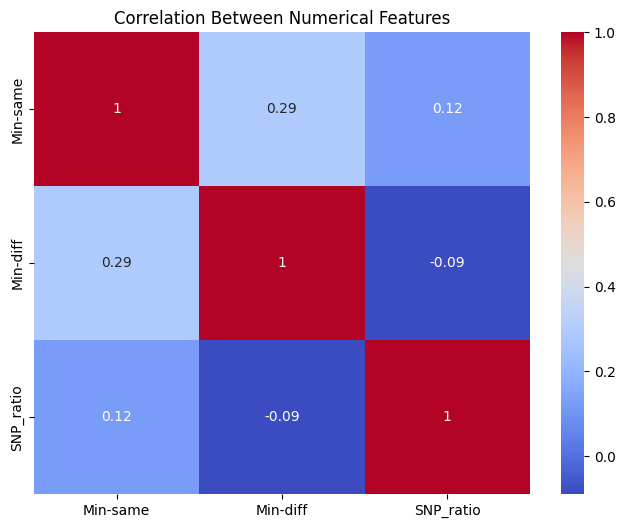

In [25]:
import numpy as np

num_cols = ['Min-same', 'Min-diff']
df_num = df_cleaned[num_cols].copy()
df_num['SNP_ratio'] = df_num['Min-same'] / (df_num['Min-diff'] + 1e-6)

plt.figure(figsize=(8, 6))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()


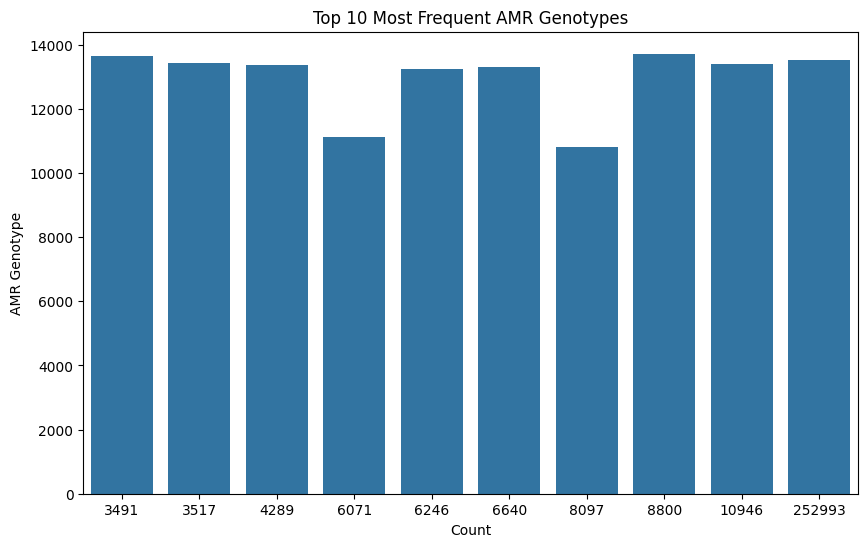

In [26]:
top_amr = df_cleaned['AMR genotypes'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_amr.values, y=top_amr.index)
plt.title('Top 10 Most Frequent AMR Genotypes')
plt.xlabel('Count')
plt.ylabel('AMR Genotype')
plt.show()


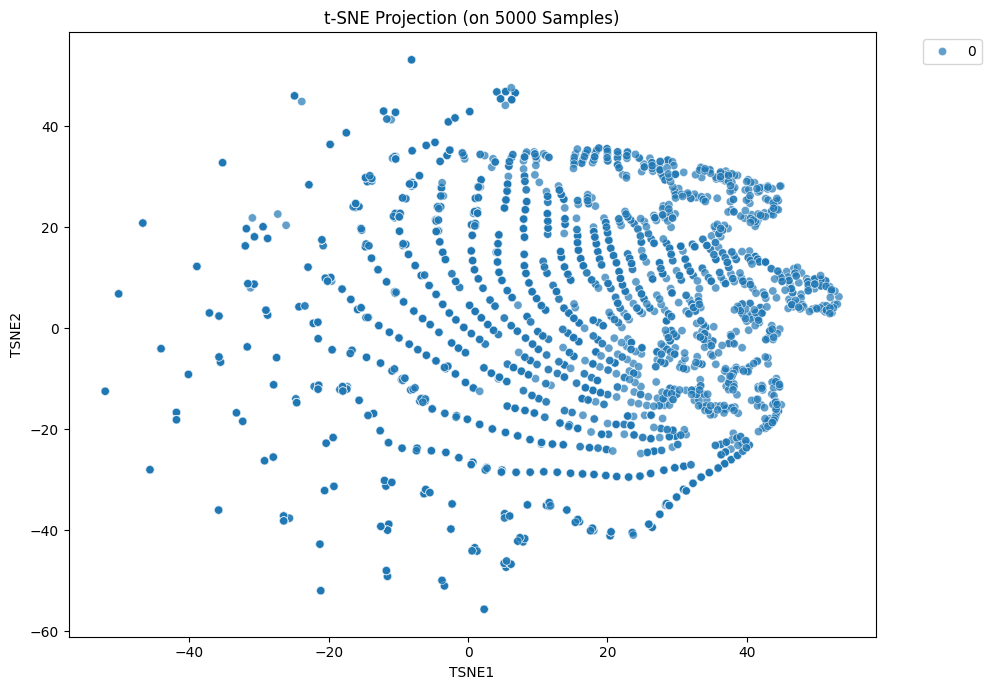

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Sample 5000 rows
df_sample = df_cleaned[['Min-same', 'Min-diff', '#Organism group']].dropna().sample(n=5000, random_state=42)

# Scale features
X = df_sample[['Min-same', 'Min-diff']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
X_embedded = tsne.fit_transform(X_scaled)

# Add results back to DataFrame
df_sample['TSNE1'] = X_embedded[:, 0]
df_sample['TSNE2'] = X_embedded[:, 1]

# ✅ Plot with Seaborn (corrected)
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=df_sample,
    x='TSNE1', y='TSNE2',
    hue='#Organism group',
    palette='tab10',
    alpha=0.7,
    legend='full'
)
plt.title('t-SNE Projection (on 5000 Samples)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


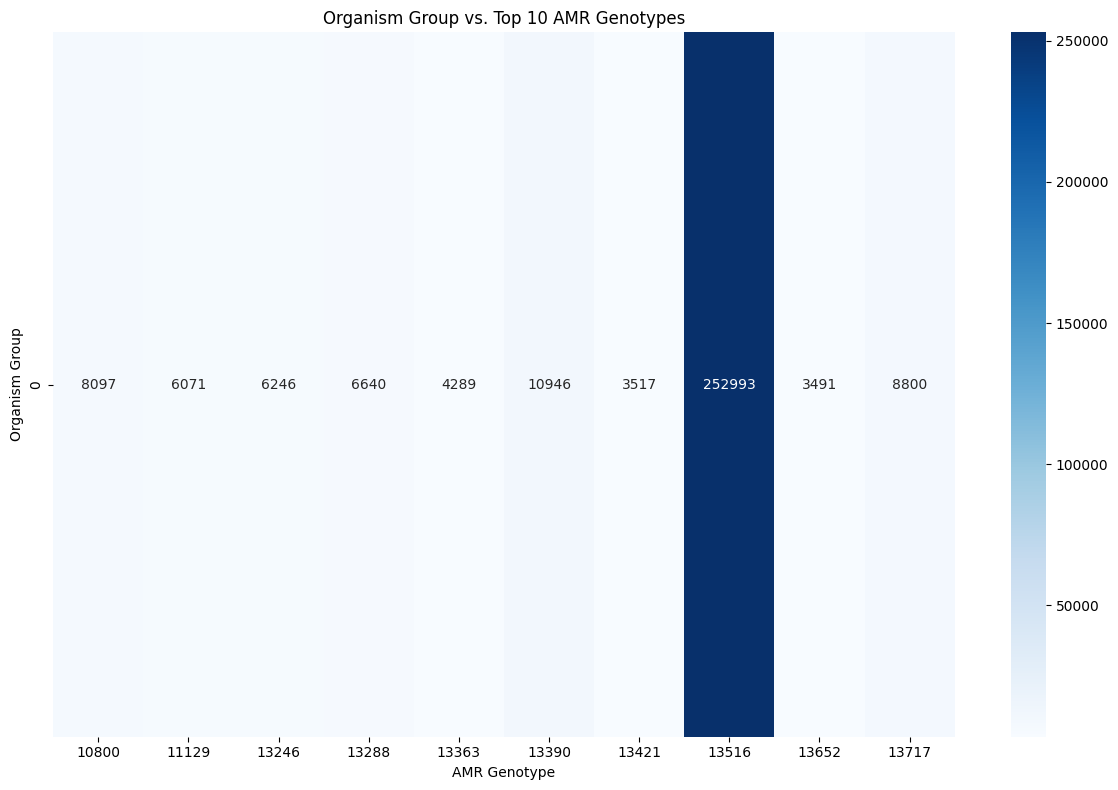

In [28]:
# Simplify for top 10 AMR genotypes
top_amr = df_cleaned['AMR genotypes'].value_counts().head(10).index
top_orgs = df_cleaned['#Organism group'].value_counts().head(10).index

subset = df_cleaned[
    df_cleaned['AMR genotypes'].isin(top_amr) & 
    df_cleaned['#Organism group'].isin(top_orgs)
]

heatmap_data = subset.groupby(['#Organism group', 'AMR genotypes']).size().unstack(fill_value=0)

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')
plt.title('Organism Group vs. Top 10 AMR Genotypes')
plt.xlabel('AMR Genotype')
plt.ylabel('Organism Group')
plt.tight_layout()
plt.show()


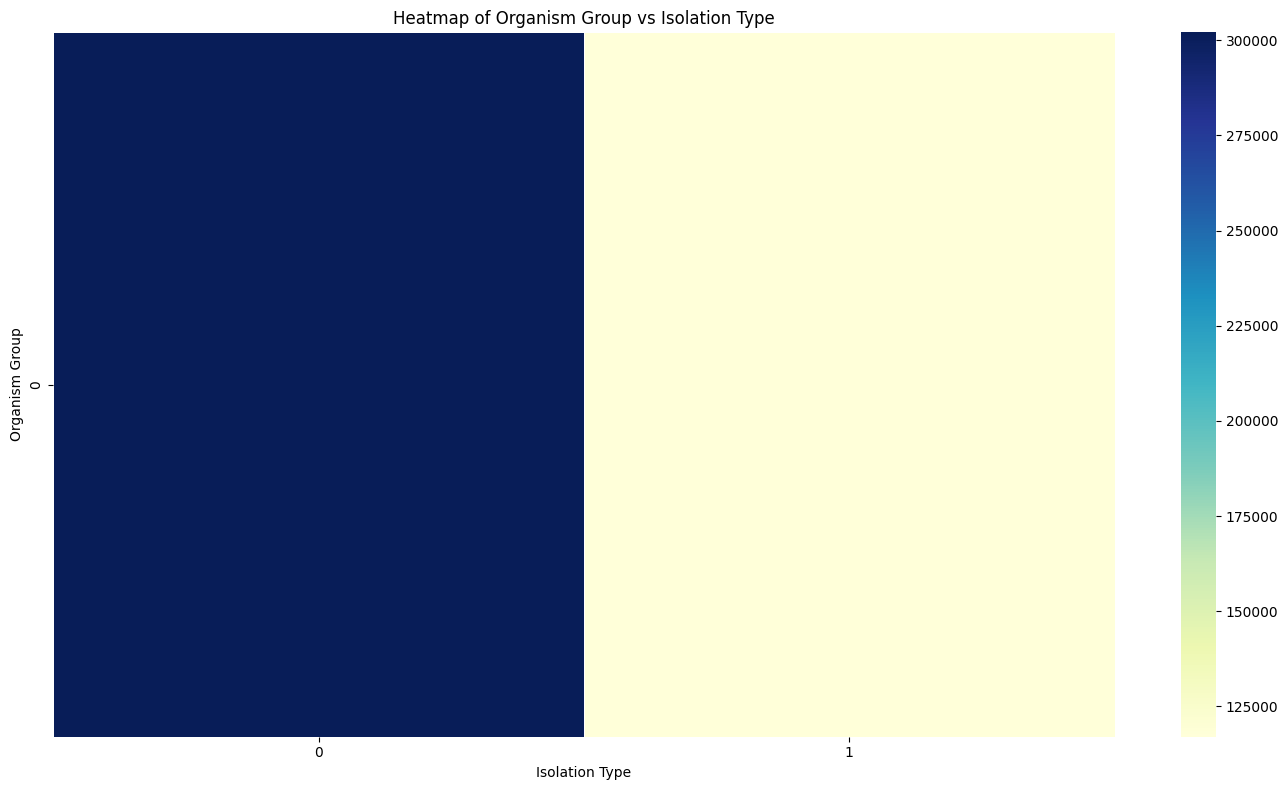

In [29]:
pivot_table = pd.crosstab(df_cleaned['#Organism group'], df_cleaned['Isolation type'])

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Organism Group vs Isolation Type')
plt.xlabel('Isolation Type')
plt.ylabel('Organism Group')
plt.tight_layout()
plt.show()


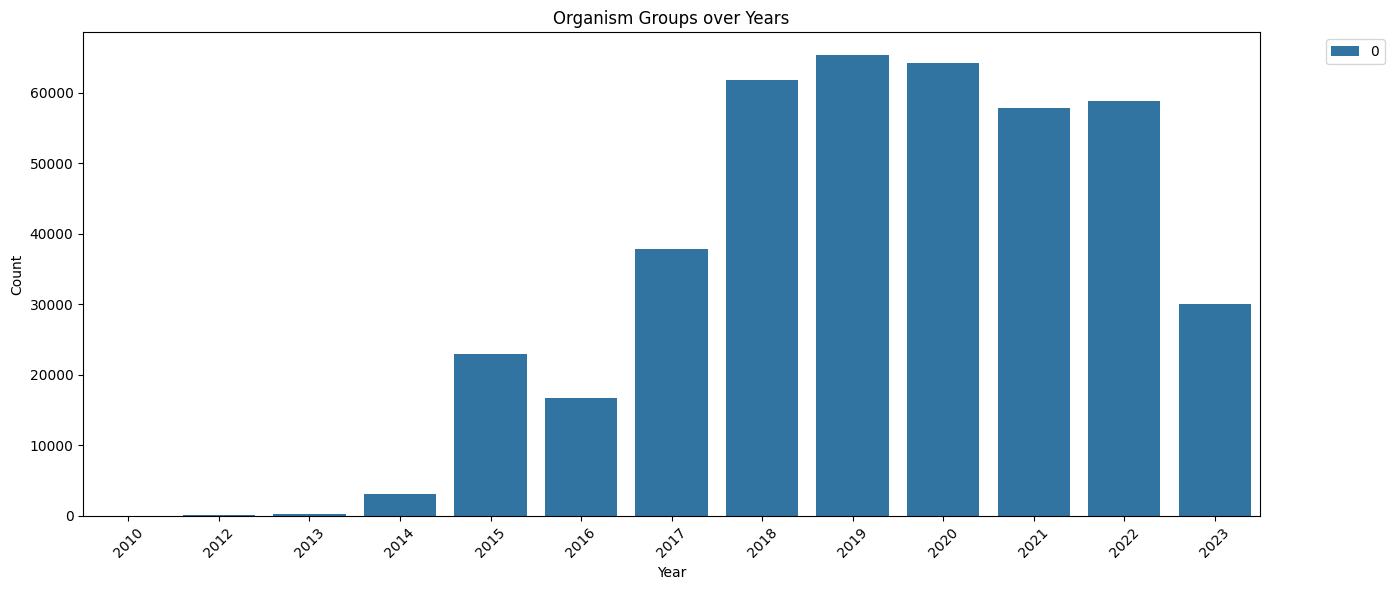

In [30]:
df_cleaned['Year'] = df_cleaned['Create date'].dt.year

plt.figure(figsize=(14, 6))
sns.countplot(data=df_cleaned, x='Year', hue='#Organism group', palette='tab10')
plt.title('Organism Groups over Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


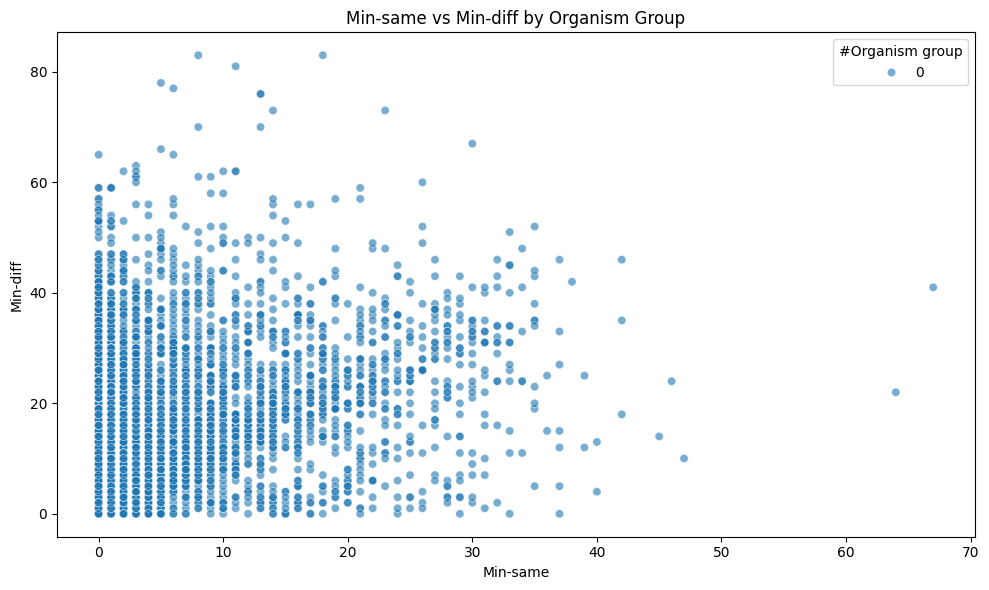

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cleaned.sample(5000, random_state=42),  # sample for speed
    x='Min-same', y='Min-diff', hue='#Organism group', alpha=0.6, palette='tab10'
)
plt.title('Min-same vs Min-diff by Organism Group')
plt.tight_layout()
plt.show()


In [32]:
unique_strains = df_cleaned['Strain'].nunique()

unique_locations = df_cleaned['Location'].nunique()

unique_isolation_types = df_cleaned['Isolation type'].nunique()
unique_snp_clusters = df_cleaned['SNP cluster'].nunique()

In [33]:
unique_snp_clusters

22894

In [34]:
unique_isolation_types

2

In [35]:
unique_locations

958

In [36]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'Location', 'Isolation source', 'Serovar', 'AMR genotypes', and 'Computed types' columns using label encoding
label_encoded_columns = df_cleaned[['Location', 'AMR genotypes', 'Computed types']].apply(label_encoder.fit_transform)

# Concatenate the label encoded DataFrame with the original DataFrame
df_cleaned = pd.concat([df_cleaned, label_encoded_columns], axis=1)

# Drop the original 'Location', 'Isolation source', 'Serovar', 'AMR genotypes', and 'Computed types' columns
df_cleaned = df_cleaned.drop(['Location', 'AMR genotypes', 'Computed types'], axis=1)

# Display the first few rows of the cleaned DataFrame
df_cleaned.head()

,#Organism group,Strain,Isolate identifiers,Isolate,Create date,Isolation type,SNP cluster,Min-same,Min-diff,BioSample,Assembly,Create_Year,Create_Month,Create_Weekday,Assembly_missing,SNP_ratio,Year
0,0,405914,80097,0,2014-01-04 17:03:07+00:00,1,7301,0.0,12.0,10070,370593,2014,2014-01,5,0,0.000000,2014
1,0,405915,80096,1,2014-01-04 17:03:07+00:00,1,7301,0.0,12.0,10071,370593,2014,2014-01,5,0,0.000000,2014
2,0,405916,80098,2,2014-01-04 17:03:07+00:00,1,13445,0.0,25.0,10072,370593,2014,2014-01,5,0,0.000000,2014
3,0,173647,195338,3,2014-01-04 17:03:07+00:00,1,22397,2.0,2.0,10073,163104,2014,2014-01,5,0,1.000000,2014
4,0,173648,195339,4,2014-01-04 17:03:07+00:00,1,22397,2.0,17.0,10074,163103,2014,2014-01,5,0,0.117647,2014


In [37]:
from sklearn.preprocessing import StandardScaler

# Create a standard scaler
scaler = StandardScaler()

# Normalize the features
data_normalized = scaler.fit_transform(df_cleaned.select_dtypes(include=['number']))

# Create a DataFrame with the normalized features
data_normalized = pd.DataFrame(data_normalized, columns=df_cleaned.select_dtypes(include=['number']).columns, index=df_cleaned.index)

# Concatenate the normalized DataFrame with the original DataFrame
df_cleaned = pd.concat([df_cleaned.select_dtypes(exclude=['number']), data_normalized], axis=1)

# Display the first few rows of the cleaned and normalized DataFrame
df_cleaned.head()

,Create date,Create_Month,#Organism group,Strain,Isolate identifiers,Isolate,Isolation type,SNP cluster,Min-same,Min-diff,BioSample,Assembly,Create_Year,Create_Weekday,Assembly_missing,SNP_ratio,Year
0,2014-01-04 17:03:07+00:00,2014-01,0.0,1.641898,-1.069895,-1.732047,1.606498,-0.196183,-0.732794,-0.237301,-1.648640,1.403199,-2.451718,1.574185,0.0,-0.077403,-2.451718
1,2014-01-04 17:03:07+00:00,2014-01,0.0,1.641906,-1.069903,-1.732038,1.606498,-0.196183,-0.732794,-0.237301,-1.648632,1.403199,-2.451718,1.574185,0.0,-0.077403,-2.451718
2,2014-01-04 17:03:07+00:00,2014-01,0.0,1.641914,-1.069886,-1.732030,1.606498,0.656441,-0.732794,0.759146,-1.648623,1.403199,-2.451718,1.574185,0.0,-0.077403,-2.451718
3,2014-01-04 17:03:07+00:00,2014-01,0.0,-0.286281,-0.117189,-1.732022,1.606498,1.898741,-0.483789,-1.003800,-1.648615,-0.373749,-2.451718,1.574185,0.0,-0.077402,-2.451718
4,2014-01-04 17:03:07+00:00,2014-01,0.0,-0.286272,-0.117181,-1.732014,1.606498,1.898741,-0.483789,0.145948,-1.648607,-0.373757,-2.451718,1.574185,0.0,-0.077403,-2.451718


In [38]:
df_cleaned = df_cleaned.drop(columns=['Create date','Create_Month'], axis=1)

In [39]:
from sklearn.model_selection import train_test_split

# Correct the mistake and create the 'AMR genotypes_encoded' column again
df_cleaned['AMR genotypes_encoded'] = label_encoder.fit_transform(label_encoded_columns['AMR genotypes'])


# Define the feature variables and the target variable
X = df_cleaned.drop(['AMR genotypes_encoded'], axis=1)
y = df_cleaned['AMR genotypes_encoded']

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((335286, 15), (83822, 15), (335286,), (83822,))

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    roc_auc_score, roc_curve, accuracy_score,
    precision_score, recall_score, f1_score
)

from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

# ----------------------
# Step 1: Downsample the dataset
# ----------------------
data = pd.DataFrame(X)
data['target'] = y

# Keep classes with at least 2 samples
class_counts = data['target'].value_counts()
valid_classes = class_counts[class_counts >= 2].index
data = data[data['target'].isin(valid_classes)]

# Take only 10% data for quick test
data_sample = data.sample(frac=0.1, random_state=42)

X_sample = data_sample.drop('target', axis=1).values
y_sample = data_sample['target'].values

# ----------------------
# Step 2: Preprocessing and Split
# ----------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_sample, test_size=0.2, stratify=y_sample, random_state=42
)

# ----------------------
# Step 3: Train Fast Model (Logistic Regression)
# ----------------------
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# ----------------------
# Step 4: Evaluation
# ----------------------
print("Quick Model Evaluation (Logistic Regression):")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC:   {roc_auc_score(y_test, y_proba):.4f}")

# ----------------------
# Step 5: ROC Curve
# ----------------------
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC={roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Quick AUC-ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
# Feature Importance for Random Forest
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)
rf_model.fit(X_train, y_train)
importances = rf_model.feature_importances_
features = df.drop(columns=["resistance_label"]).columns

# Plot Top 15 features
top_idx = np.argsort(importances)[-15:]
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_idx)), importances[top_idx], align='center')
plt.yticks(range(len(top_idx)), [features[i] for i in top_idx])
plt.xlabel('Feature Importance')
plt.title('Top 15 Important Features (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'models' is not defined